In [200]:
import pandas as pd
import numpy as np

In [201]:
df = pd.read_csv('fitness.csv')
df

,booking_id,months_as_member,weight,days_before,day_of_week,time,category,attended
0,1,17,79.56,8,Wed,PM,Strength,0
1,2,10,79.01,2,Mon,AM,HIIT,0
2,3,16,74.53,14,Sun,AM,Strength,0
3,4,5,86.12,10,Fri,AM,Cycling,0
4,5,15,69.29,8,Thu,AM,HIIT,0
...,...,...,...,...,...,...,...,...
1495,1496,21,79.51,10,Fri,AM,HIIT,0
1496,1497,29,89.55,2,Mon,AM,Strength,0
1497,1498,9,87.38,4,Tue,AM,HIIT,0
1498,1499,34,68.64,14,Sun,AM,Aqua,0


In [202]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   booking_id        1500 non-null   int64  
 1   months_as_member  1500 non-null   int64  
 2   weight            1480 non-null   float64
 3   days_before       1500 non-null   object 
 4   day_of_week       1500 non-null   object 
 5   time              1500 non-null   object 
 6   category          1500 non-null   object 
 7   attended          1500 non-null   int64  
dtypes: float64(1), int64(3), object(4)
memory usage: 93.9+ KB


In [203]:
df.isnull().sum()

booking_id           0
months_as_member     0
weight              20
days_before          0
day_of_week          0
time                 0
category             0
attended             0
dtype: int64

In [204]:
for columns in df:
    unique = df[columns].unique()
    print(columns, unique)
    print( )

booking_id [   1    2    3 ... 1498 1499 1500]

months_as_member [ 17  10  16   5  15   7  11   9  23  13   8  22   6  33  24  14   2  12
  26  28  27   1   3  21  18  19  53  20  34  25  32  73  55   4  35  54
  76  62  42 105  90  29  60  30 107  52  37  38  48  51  40  89  57  36
  44  39  41  47  58  66  45  43  61  50  65  31  97  59  93 148 111  69]

weight [79.56 79.01 74.53 ... 87.38 68.64 94.39]

days_before ['8' '2' '14' '10' '6' '4' '9' '12' '5' '3' '7' '13' '12 days' '20' '1'
 '15' '6 days' '11' '13 days' '3 days' '16' '1 days' '7 days' '8 days'
 '10 days' '14 days' '17' '5 days' '2 days' '4 days' '29']

day_of_week ['Wed' 'Mon' 'Sun' 'Fri' 'Thu' 'Wednesday' 'Fri.' 'Tue' 'Sat' 'Monday']

time ['PM' 'AM']

category ['Strength' 'HIIT' 'Cycling' 'Yoga' '-' 'Aqua']

attended [0 1]



In [205]:
df['weight'] = df['weight'].fillna(df['weight'].mean())
df.isnull().sum()


booking_id          0
months_as_member    0
weight              0
days_before         0
day_of_week         0
time                0
category            0
attended            0
dtype: int64

In [206]:
df['days_before'].unique()

array(['8', '2', '14', '10', '6', '4', '9', '12', '5', '3', '7', '13',
       '12 days', '20', '1', '15', '6 days', '11', '13 days', '3 days',
       '16', '1 days', '7 days', '8 days', '10 days', '14 days', '17',
       '5 days', '2 days', '4 days', '29'], dtype=object)

In [207]:
def strip(columns_value):
    if 'days' in columns_value:
        return (columns_value.split(' ')[0])
    else:
        return columns_value
    
df['days_before'] = df['days_before'].apply(lambda x:strip(x))

In [208]:
df['days_before'].unique()

array(['8', '2', '14', '10', '6', '4', '9', '12', '5', '3', '7', '13',
       '20', '1', '15', '11', '16', '17', '29'], dtype=object)

In [209]:
df['day_of_week'].unique()

array(['Wed', 'Mon', 'Sun', 'Fri', 'Thu', 'Wednesday', 'Fri.', 'Tue',
       'Sat', 'Monday'], dtype=object)

In [210]:
values = 'Wednesday'
len(values)

9

In [211]:
def get_the_first_three_letters(letter):
    if len(letter) > 3:
        return letter[:3]
    else:
        return letter 
        
df['day_of_week'] = df['day_of_week'].apply(lambda x:get_the_first_three_letters(x))
        

In [212]:
df['day_of_week'].unique()

array(['Wed', 'Mon', 'Sun', 'Fri', 'Thu', 'Tue', 'Sat'], dtype=object)

In [213]:
df['category'] = df['category'].replace('-', 'others')

In [214]:
df['category'].unique()

array(['Strength', 'HIIT', 'Cycling', 'Yoga', 'others', 'Aqua'],
      dtype=object)

In [215]:
#change datatype of days before to int

df['days_before'] = df['days_before'].astype('int')

In [216]:
df['days_before'].unique()

array([ 8,  2, 14, 10,  6,  4,  9, 12,  5,  3,  7, 13, 20,  1, 15, 11, 16,
       17, 29])

In [217]:
df.drop('booking_id', axis = 1, inplace = True)

In [218]:
df['day_of_week'].unique()

array(['Wed', 'Mon', 'Sun', 'Fri', 'Thu', 'Tue', 'Sat'], dtype=object)

In [219]:
df.head()

,months_as_member,weight,days_before,day_of_week,time,category,attended
0,17,79.56,8,Wed,PM,Strength,0
1,10,79.01,2,Mon,AM,HIIT,0
2,16,74.53,14,Sun,AM,Strength,0
3,5,86.12,10,Fri,AM,Cycling,0
4,15,69.29,8,Thu,AM,HIIT,0


slight exploratory data analysis

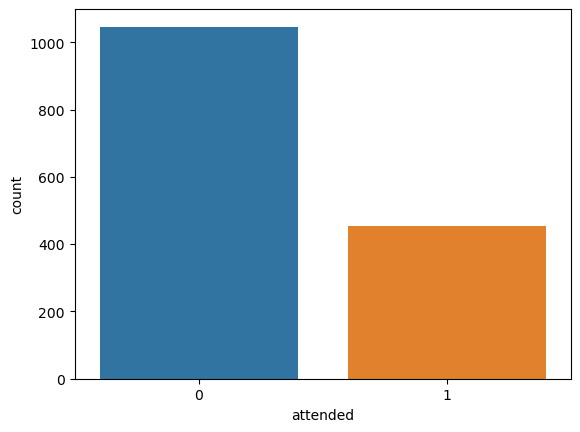

In [222]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(x=df['attended'],

In [229]:
df.head()

,months_as_member,weight,days_before,day_of_week,time,category,attended
0,17,79.56,8,Wed,PM,Strength,0
1,10,79.01,2,Mon,AM,HIIT,0
2,16,74.53,14,Sun,AM,Strength,0
3,5,86.12,10,Fri,AM,Cycling,0
4,15,69.29,8,Thu,AM,HIIT,0


In [230]:
len(df['months_as_member'].unique())

72

In [232]:
len(df['days_before'].unique())

19

In [235]:
num = ['months_as_member', 'weight', 'days_before']

for i in num:
    print(f'{i} : {len(df[i].unique())}')

months_as_member : 72
weight : 1242
days_before : 19


C:\Users\CHOKO\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


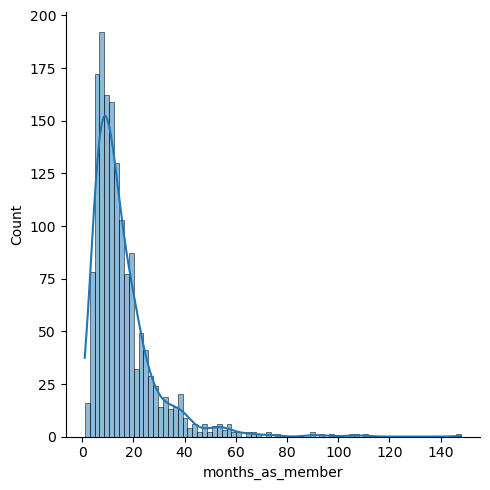

C:\Users\CHOKO\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


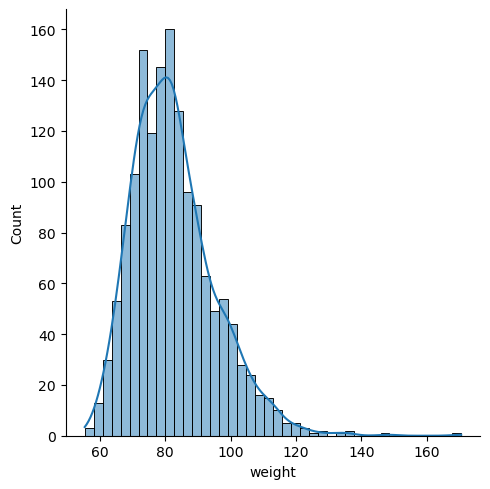

C:\Users\CHOKO\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


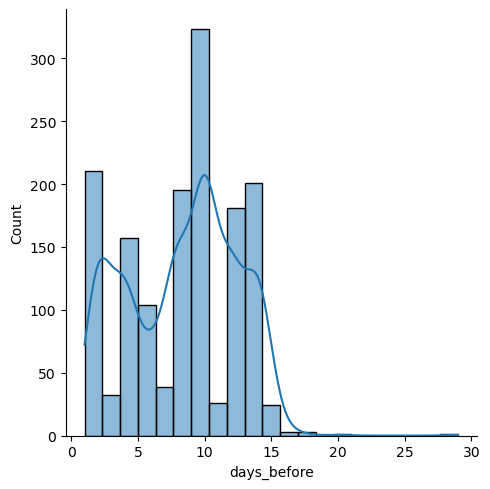

In [225]:
numerical_columns = ['months_as_member', 'weight', 'days_before']
for values in numerical_columns:
     sns.displot(df[values], kde = True);
     plt.show()

C:\Users\CHOKO\AppData\Local\Temp\ipykernel_13228\2172728356.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[values]);


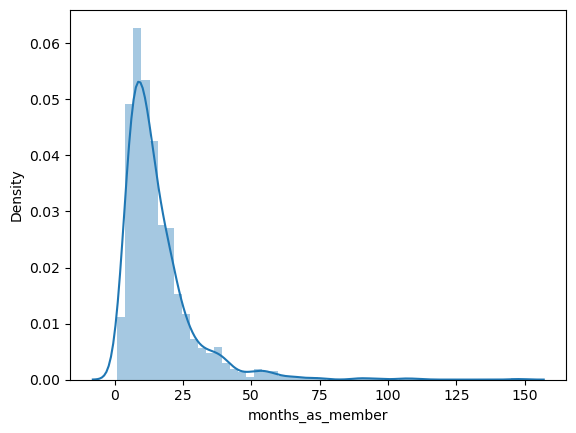

C:\Users\CHOKO\AppData\Local\Temp\ipykernel_13228\2172728356.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[values]);


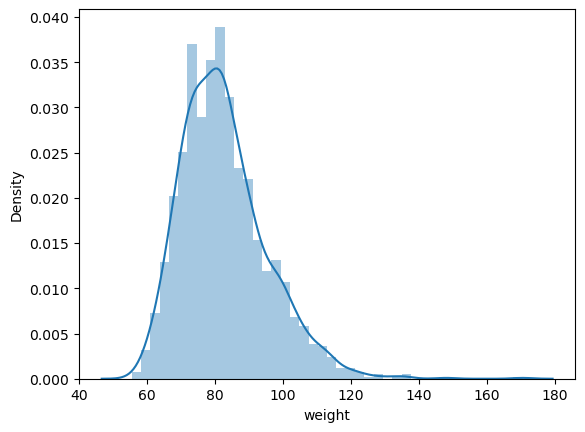

In [236]:
numerical_columns = ['months_as_member', 'weight']
for values in numerical_columns:
     sns.distplot(df[values]);
     plt.show()

Preparing the data for Machine Learning Model

In [237]:
df.head()

,months_as_member,weight,days_before,day_of_week,time,category,attended
0,17,79.56,8,Wed,PM,Strength,0
1,10,79.01,2,Mon,AM,HIIT,0
2,16,74.53,14,Sun,AM,Strength,0
3,5,86.12,10,Fri,AM,Cycling,0
4,15,69.29,8,Thu,AM,HIIT,0


1 Check for skewness in numerical variable

In [238]:
df['months_as_member'].skew()

3.139781780718212

In [239]:
df['weight'].skew()

1.0212286661076322

In [240]:
for values in numerical_columns:
    skew = df[values].skew()
    skew = round(skew,2)
    print(values, skew)

months_as_member 3.14
weight 1.02


In [241]:
#bring the values to normal distribution
for values in numerical_columns:
    df[values] = np.log(df[values])

C:\Users\CHOKO\AppData\Local\Temp\ipykernel_13228\563807398.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[values]);


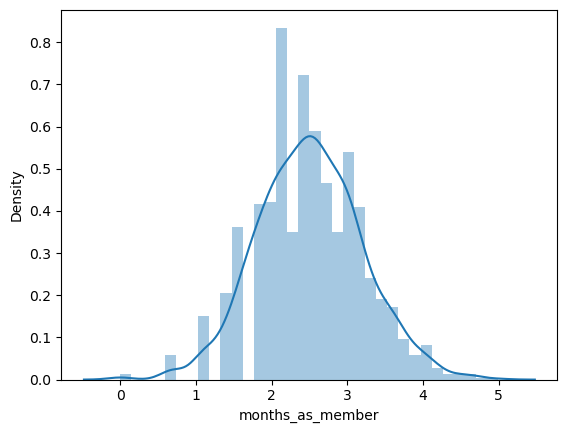

C:\Users\CHOKO\AppData\Local\Temp\ipykernel_13228\563807398.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[values]);


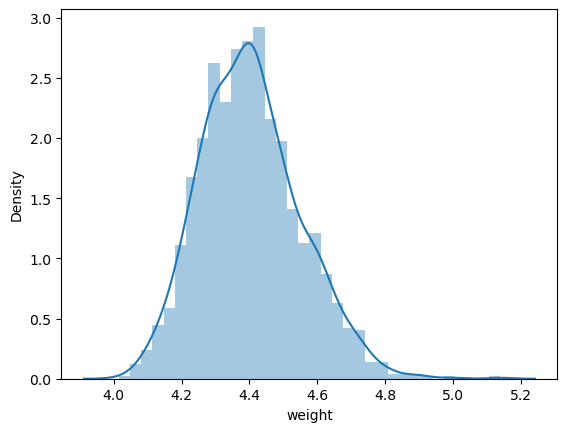

In [242]:
#check results
numerical_columns = ['months_as_member', 'weight']

for values in numerical_columns:
    sns.distplot(df[values]);
    plt.show()

In [243]:
for values in numerical_columns:
    skew = df[values].skew()
    skew = round(skew,2)
    print(values, skew)

months_as_member 0.06
weight 0.46


2 One hot encoding for categorical variables

In [244]:
df = pd.get_dummies(df)

In [246]:
df.head()

,months_as_member,weight,days_before,attended,day_of_week_Fri,day_of_week_Mon,day_of_week_Sat,day_of_week_Sun,day_of_week_Thu,day_of_week_Tue,day_of_week_Wed,time_AM,time_PM,category_Aqua,category_Cycling,category_HIIT,category_Strength,category_Yoga,category_others
0,2.833213,4.376511,8,0,False,False,False,False,False,False,True,False,True,False,False,False,True,False,False
1,2.302585,4.369574,2,0,False,True,False,False,False,False,False,True,False,False,False,True,False,False,False
2,2.772589,4.311202,14,0,False,False,False,True,False,False,False,True,False,False,False,False,True,False,False
3,1.609438,4.455742,10,0,True,False,False,False,False,False,False,True,False,False,True,False,False,False,False
4,2.708050,4.238301,8,0,False,False,False,False,True,False,False,True,False,False,False,True,False,False,False


In [247]:
df.shape

(1500, 19)

3 Feature scaling using min max scaling

In [248]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

scaled_features = [features for features in df.columns]
scaled_data = scaler.fit_transform(df)

df = pd.DataFrame(data = scaled_data, columns= scaled_features)
df

,months_as_member,weight,days_before,attended,day_of_week_Fri,day_of_week_Mon,day_of_week_Sat,day_of_week_Sun,day_of_week_Thu,day_of_week_Tue,day_of_week_Wed,time_AM,time_PM,category_Aqua,category_Cycling,category_HIIT,category_Strength,category_Yoga,category_others
0,0.566959,0.321816,0.250000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.460774,0.315645,0.035714,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.554827,0.263716,0.464286,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.322067,0.392300,0.321429,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.541912,0.198863,0.250000,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,0.609244,0.321257,0.321429,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1496,0.673835,0.427044,0.035714,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1497,0.439690,0.405221,0.107143,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1498,0.705666,0.190478,0.464286,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


4 Train-Test_Split

In [249]:
X = df.drop('attended', axis = 1)
y = df['attended']

In [250]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)

In [252]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1200, 18)
(300, 18)
(1200,)
(300,)
